# Airline Traffic Analysis

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
df=pd.read_csv("air_traffic_data.csv")

In [3]:
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


## Data Preparation :

In [4]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

**The data was loaded and was checked if any null values exist. We found that there are null values present in "Operating Airline IATA Code" and "Published Airline IATA Code" column.**

In [5]:
df['Operating Airline IATA Code'].fillna('unknown',inplace=True)

In [6]:
df['Published Airline IATA Code'].fillna('unknown',inplace=True)

**Here null values as filled with "unknown" value**

In [36]:
df.isnull().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Adjusted Activity Type Code    0
Adjusted Passenger Count       0
Year                           0
Month                          0
dtype: int64

**Now there are no null values in the data.**

In [26]:
df['Operating Airline'].unique()

array(['ATA Airlines', 'Air Canada ', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines',
       'American Eagle Airlines', 'Asiana Airlines',
       'Atlantic Southeast Airlines', 'BelAir Airlines',
       'British Airways', 'Cathay Pacific', 'China Airlines',
       'Delta Air Lines', 'EVA Airways', 'Frontier Airlines',
       'Hawaiian Airlines', 'Horizon Air ', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'Mesa Airlines',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines', 'SkyWest Airlines',
       'Sun Country Airlines', 'TACA', 'US Airways', 'United Airlines',
       'United Airlines - Pre 07/01/2013', 'Virgin Atlantic',
       'WestJet Airlines', 'Boeing Company', 'Miami Air International',
       'Air Canada Jazz', 'Qantas A

In [28]:
df['Operating Airline'] = df['Operating Airline'].replace("United Airlines - Pre 07/01/2013", "United Airlines")

In [29]:
df['Operating Airline'].unique()

array(['ATA Airlines', 'Air Canada ', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines',
       'American Eagle Airlines', 'Asiana Airlines',
       'Atlantic Southeast Airlines', 'BelAir Airlines',
       'British Airways', 'Cathay Pacific', 'China Airlines',
       'Delta Air Lines', 'EVA Airways', 'Frontier Airlines',
       'Hawaiian Airlines', 'Horizon Air ', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'Mesa Airlines',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines', 'SkyWest Airlines',
       'Sun Country Airlines', 'TACA', 'US Airways', 'United Airlines',
       'Virgin Atlantic', 'WestJet Airlines', 'Boeing Company',
       'Miami Air International', 'Air Canada Jazz', 'Qantas Airways',
       'Ameriflight', 'Spirit Airl

In [30]:
df['Published Airline'].unique()

array(['ATA Airlines', 'Air Canada ', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines', 'Asiana Airlines',
       'Delta Air Lines', 'BelAir Airlines', 'British Airways',
       'Cathay Pacific', 'China Airlines', 'EVA Airways',
       'Frontier Airlines', 'Hawaiian Airlines', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'US Airways',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines',
       'United Airlines - Pre 07/01/2013', 'Sun Country Airlines', 'TACA',
       'United Airlines', 'Virgin Atlantic', 'WestJet Airlines',
       'Boeing Company', 'Miami Air International', 'Qantas Airways',
       'Ameriflight', 'Spirit Airlines', 'Xtra Airways',
       'Evergreen International Airlines', 'Aeromexico',
       'JetBlue Airways ', '

In [31]:
df['Published Airline'] = df['Published Airline'].replace("United Airlines - Pre 07/01/2013","United Airlines")
df['Published Airline'].unique()

array(['ATA Airlines', 'Air Canada ', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines', 'Asiana Airlines',
       'Delta Air Lines', 'BelAir Airlines', 'British Airways',
       'Cathay Pacific', 'China Airlines', 'EVA Airways',
       'Frontier Airlines', 'Hawaiian Airlines', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'US Airways',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines', 'United Airlines',
       'Sun Country Airlines', 'TACA', 'Virgin Atlantic',
       'WestJet Airlines', 'Boeing Company', 'Miami Air International',
       'Qantas Airways', 'Ameriflight', 'Spirit Airlines', 'Xtra Airways',
       'Evergreen International Airlines', 'Aeromexico',
       'JetBlue Airways ', 'Southwest Airlines', 'Virgin America',
    

In [32]:
df['GEO Region'].unique()

array(['US', 'Canada', 'Asia', 'Europe', 'Australia / Oceania', 'Mexico',
       'Central America', 'Middle East', 'South America'], dtype=object)

In [33]:
df['GEO Summary'].unique()

array(['Domestic', 'International'], dtype=object)

In [34]:
df['Activity Type Code'].unique()

array(['Deplaned', 'Enplaned', 'Thru / Transit'], dtype=object)

In [35]:
df['Adjusted Activity Type Code'].unique()

array(['Deplaned', 'Enplaned', 'Thru / Transit * 2'], dtype=object)

**Here all columns were checked for unique values and column having inappropriate names were replaced with the correct names.**

In [8]:
df['Activity Period']=pd.to_datetime(df['Activity Period'],format='%Y%m')

In [9]:
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,2016-03-01,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,2016-03-01,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,2016-03-01,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,2016-03-01,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


**The data type of "Activity Period" column was changed to "datetime64" to make is more usable.**

## Exploratory Data Analysis (EDA):

### ***What are the key statistics for passenger counts, and how are they distributed?***

In [25]:
df.describe()

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
count,15007,15007.000000,15007.000000,15007.000000
mean,2010-11-05 19:37:51.020190464,29240.521090,29331.917105,2010.385220
min,2005-07-01 00:00:00,1.000000,1.000000,2005.000000
25%,2008-03-01 00:00:00,5373.500000,5495.500000,2008.000000
50%,2010-11-01 00:00:00,9210.000000,9354.000000,2010.000000
75%,2013-08-01 00:00:00,21158.500000,21182.000000,2013.000000
max,2016-03-01 00:00:00,659837.000000,659837.000000,2016.000000
std,NaN,58319.509284,58284.182219,3.137589


**Key statistics for passengers counts are Activity Period,	Passenger Count, Adjusted Passenger Count & Year.The difference between the mean and median(50%) indicates the presence of outliers in the data such as max value(65k) which makes the data right-skewed**

### ***Which regions (GEO Summary and GEO Region) have the highest and lowest passenger traffic?***

In [11]:
df.groupby('GEO Region')['Passenger Count'].count()

GEO Region
Asia                   3273
Australia / Oceania     737
Canada                 1418
Central America         274
Europe                 2089
Mexico                 1115
Middle East             214
South America            90
US                     5797
Name: Passenger Count, dtype: int64

In [12]:
df.groupby('GEO Summary')['Passenger Count'].count()

GEO Summary
Domestic         5797
International    9210
Name: Passenger Count, dtype: int64

**Based on region Asia has the highest passenger count and South America has the lowest passenger count and based on Geo Summary International has the highest passenger count and Domestic has the lowest passenger count.**

### ***How do the different activity types (Deplaned, Enplaned, etc.) contribute to passenger counts?***

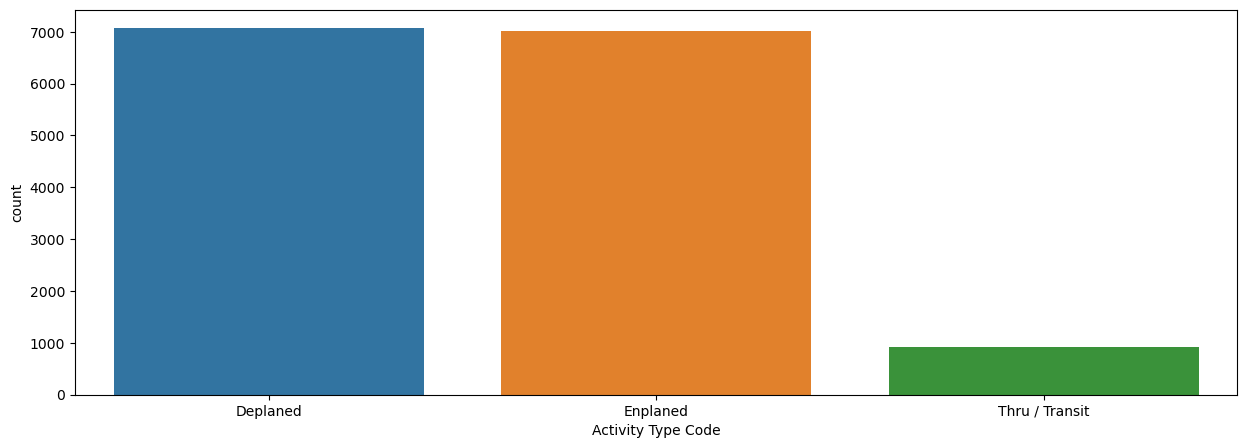

In [13]:
plt.figure(figsize=(15,5))
sb.countplot(x = df['Activity Type Code'])
plt.show()

**Deplaned contribute slightly more to passsenger counts than Enplaned and Thru / Transit contrubute the least.**

## Temporal Analysis

### ***How has passenger traffic evolved over the years and months?***

In [14]:

pivot=pd.pivot_table(data=df,index='Year',columns='Month',values='Passenger Count',aggfunc='sum')
pivot


Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2005,NaN,3195866.0,2671797.0,NaN,NaN,3225769.0,NaN,NaN,NaN,2617333.0,2770715.0,2740553.0
2006,2773293.0,3143839.0,2698200.0,2223024.0,2448889.0,3227605.0,3071396.0,2708778.0,2829000.0,2653887.0,2834959.0,2720100.0
2007,2869247.0,3436417.0,2903637.0,2304990.0,2507430.0,3382382.0,3263621.0,2820085.0,3056934.0,2922500.0,3129309.0,2957530.0
2008,3029021.0,3612297.0,2962937.0,2595676.0,2670053.0,3603946.0,3453751.0,3127387.0,3305954.0,2744485.0,3124451.0,3004720.0
2009,3024973.0,3650668.0,3074209.0,2359800.0,2644539.0,3649702.0,3419595.0,2925918.0,3177100.0,2971484.0,3249428.0,3191526.0
2010,3139059.0,3771842.0,3167124.0,2515361.0,2785466.0,3765824.0,3612886.0,3105958.0,3380355.0,3163659.0,3490100.0,3356365.0
2011,3200527.0,3917884.0,3441693.0,2610667.0,2883810.0,3935589.0,3766323.0,3129205.0,3547804.0,3326859.0,3602455.0,3564970.0
2012,3563007.0,4356216.0,3443039.0,2998119.0,3211600.0,4284443.0,4107195.0,3472440.0,3820570.0,3478890.0,3844987.0,3819379.0
2013,3604104.0,4347059.0,3814984.0,2966477.0,3204637.0,4176486.0,4146797.0,3593364.0,3933016.0,3466878.0,3910790.0,3781168.0


**Passenger traffic steadily increased from 2005 to 2015, showing year-on-year growth. Peak traffic is observed in July, August, and October, while February generally has lower traffic. Some data for 2005 and 2016 is missing.**

### ***Are there specific months or seasons that show peak or low passenger traffic?***

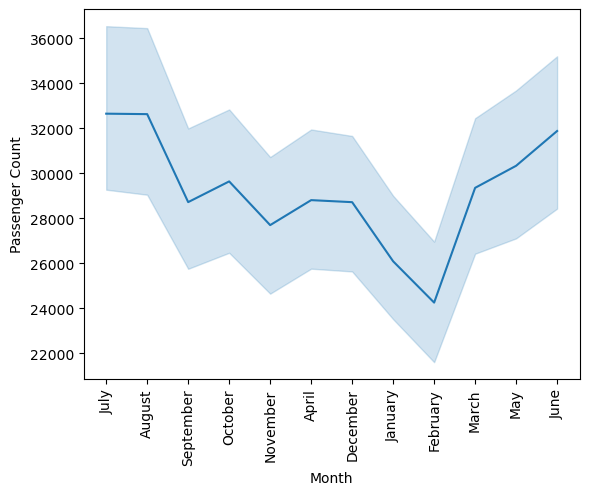

In [15]:
sb.lineplot(x=df['Month'],y=df['Passenger Count'])
plt.xticks(rotation=90)
plt.show()

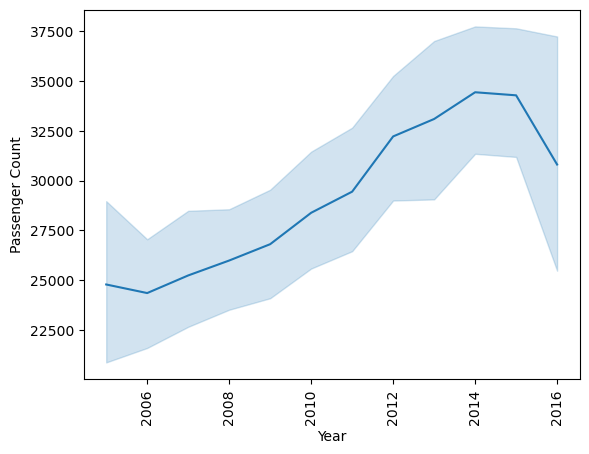

In [16]:
sb.lineplot(x=df['Year'],y=df['Passenger Count'])
plt.xticks(rotation=90)
plt.show()

**Passenger traffic peaks in May, June, and July, with July being the highest. The lowest counts occur in January and February, showing a clear rise in summer and dip in winter.**

### ***What trends can be identified from year-over-year passenger data?***

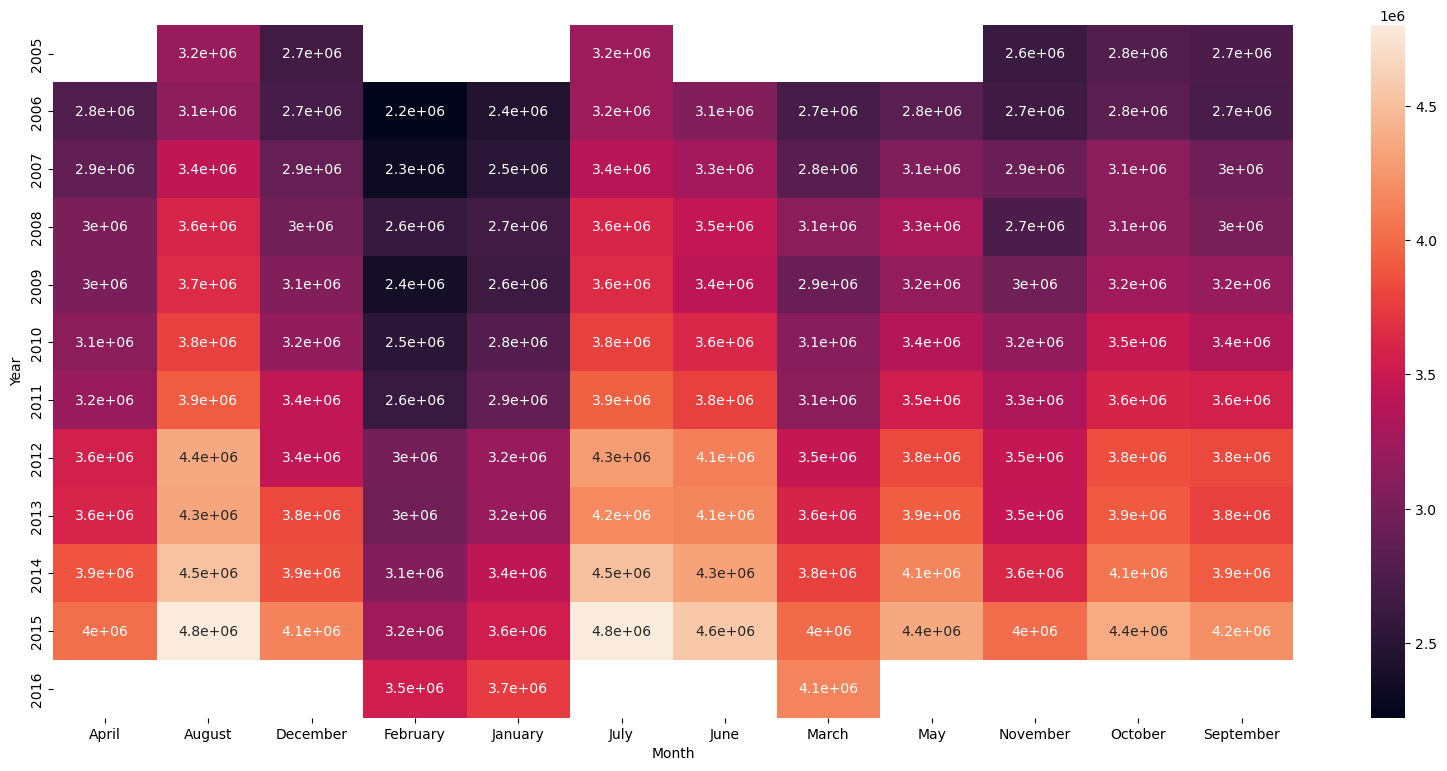

In [17]:
plt.figure(figsize=(20,9))
sb.heatmap(pivot,annot=True)
plt.show()

**Passenger traffic shows a consistent year-over-year increase from 2005 to 2015 across most months, with August, December, and July seeing the highest growth. The highest overall counts are observed in 2015, while 2016 shows a partial drop due to missing data for some months.**

## Airline Analysis: 

### ***Which airlines handle the highest and lowest number of passengers?***

In [18]:
df.groupby('Operating Airline')['Passenger Count'].sum().nlargest(1)

Operating Airline
United Airlines - Pre 07/01/2013    105363917
Name: Passenger Count, dtype: int64

In [19]:
df.groupby('Operating Airline')['Passenger Count'].sum().nsmallest(1)

Operating Airline
Evergreen International Airlines    4
Name: Passenger Count, dtype: int64

**United Airlines handle the highest and Evergreen International Airlines handles the lowest number of passengers.**

### ***How is passenger traffic distributed among different airlines?***

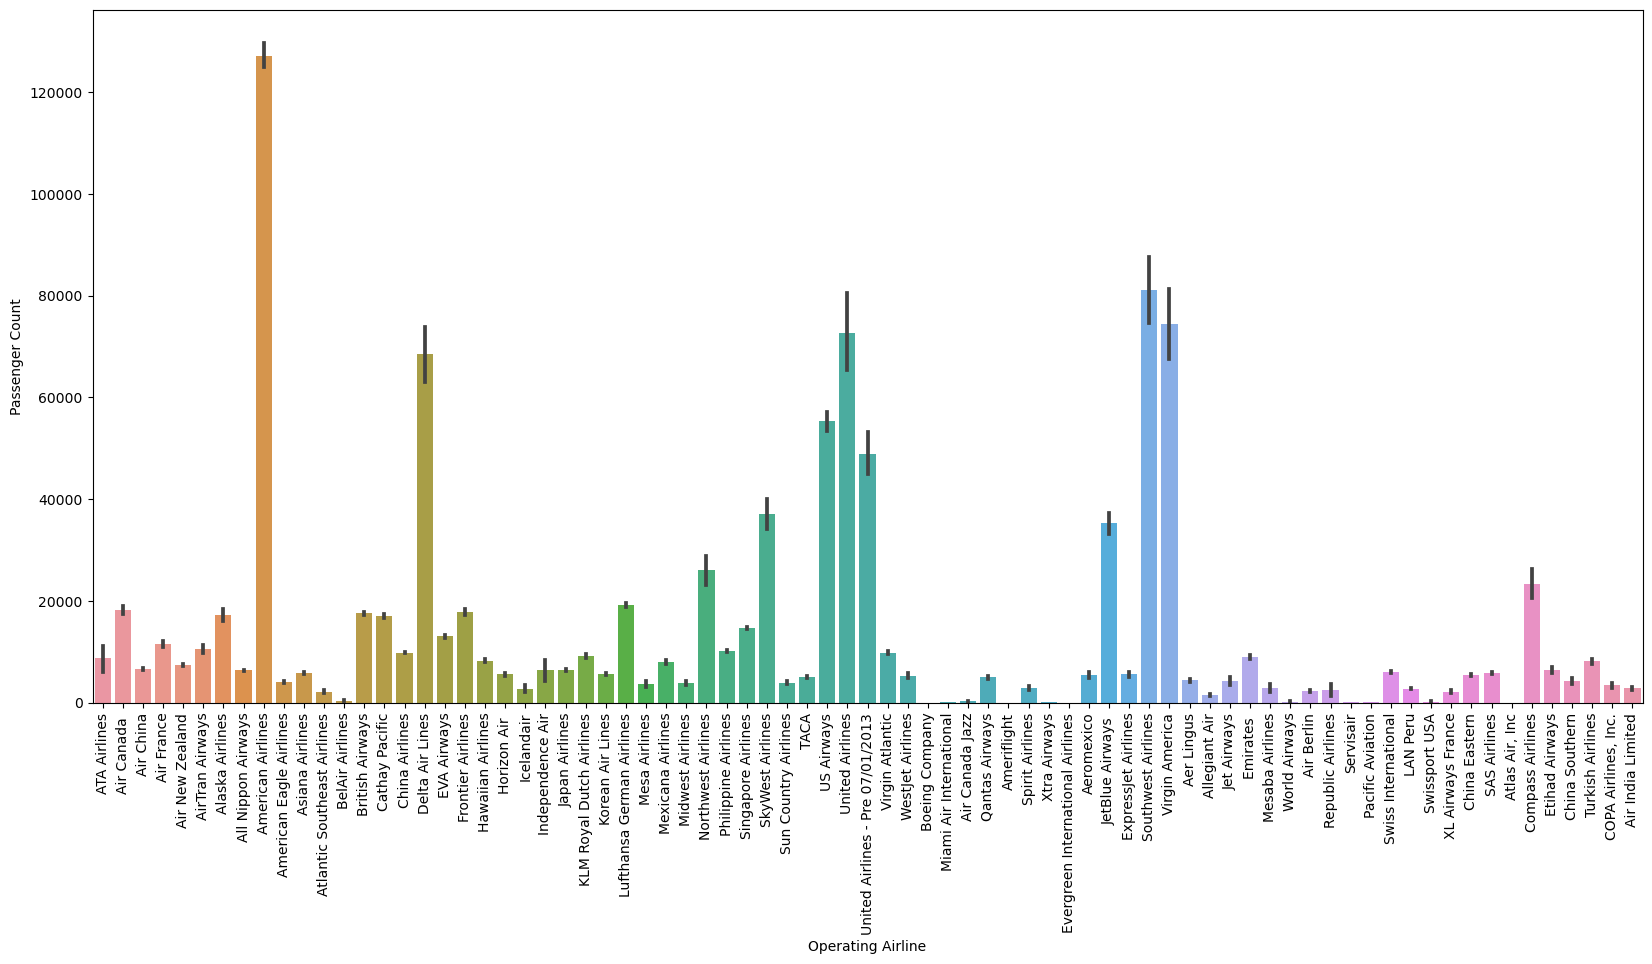

In [20]:
plt.figure(figsize=(20,9))
sb.barplot(x=df['Operating Airline'],y=df['Passenger Count'])
plt.xticks(rotation=90)
plt.show()

**Passenger traffic is unevenly distributed among airlines. Southwest Airlines has the highest passenger count by a large margin, followed by American Airlines, Delta Airlines, and United Airlines. Most other airlines have significantly lower passenger traffic, with many showing only modest volumes.** 

## Terminal and Boarding Area Analysis:

### ***Which terminals and boarding areas are the busiest in terms of passenger traffic?***

In [21]:
df.groupby('Terminal')['Passenger Count'].sum().nlargest(3)

Terminal
Terminal 3       179413582
International    115284414
Terminal 1       110054064
Name: Passenger Count, dtype: int64

In [22]:
df.groupby('Boarding Area')['Passenger Count'].sum().nlargest(3)

Boarding Area
F    138526673
B     67373108
A     58079886
Name: Passenger Count, dtype: int64

**"Terminal 3", "International" and "Terminal 1" whereas boarding areas "F", "B" and "A" are busiest in terms of passenger traffic.**

### ***Is there a notable difference in usage between terminals or boarding areas?***

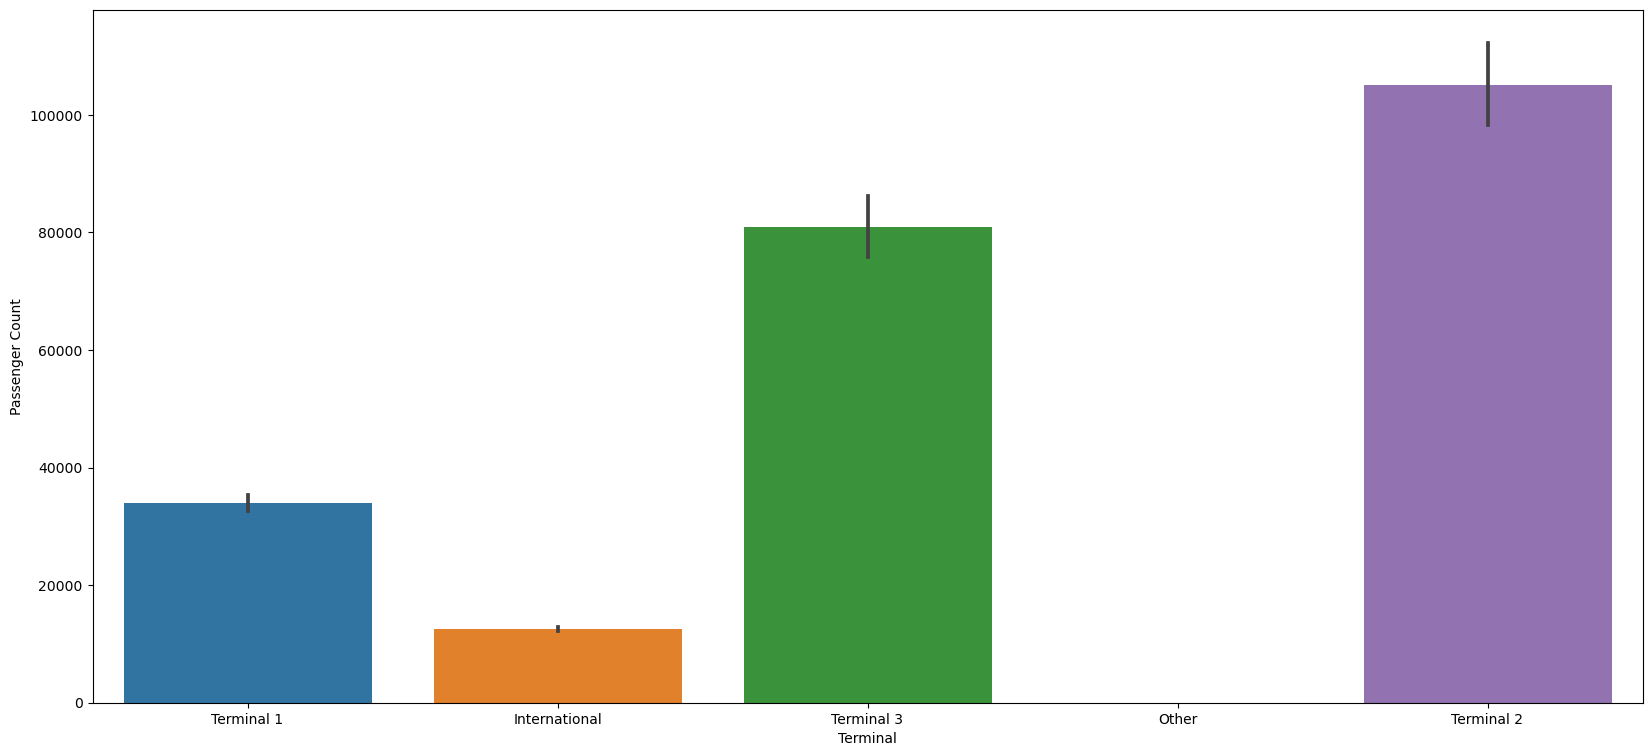

In [23]:
plt.figure(figsize=(20,9))
sb.barplot(x=df['Terminal'],y=df['Passenger Count'])
plt.show()

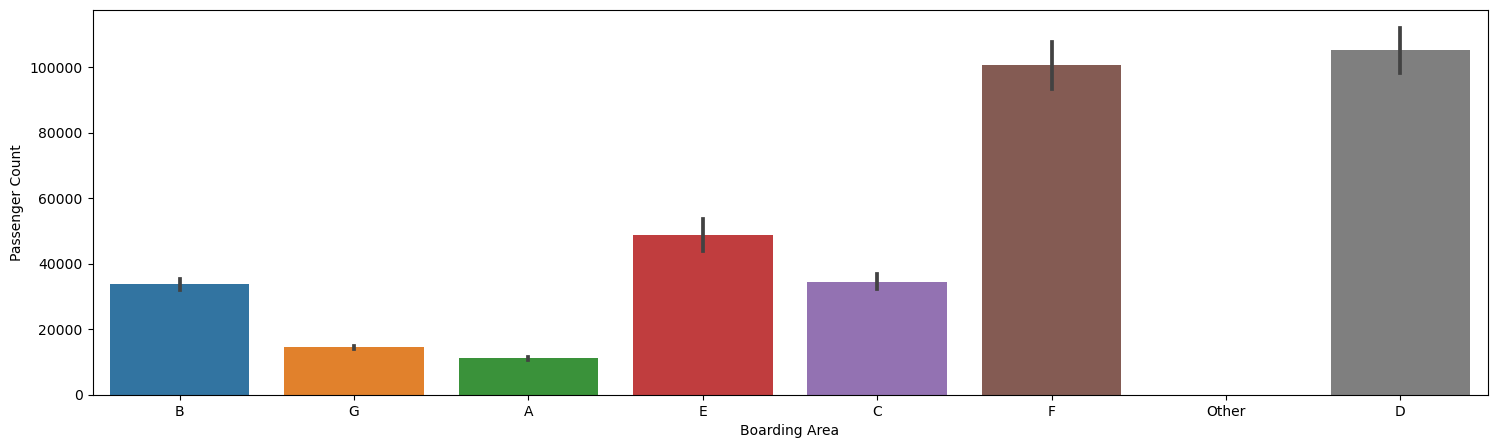

In [24]:
plt.figure(figsize=(18,5))
sb.barplot(x=df['Boarding Area'],y=df['Passenger Count'])
plt.show()

**Yes, there's a clear difference in usage, Terminal 2 handles the highest passenger traffic, followed by Terminal 3. The International terminal sees the least. Boarding Areas D and F are the busiest, while Areas A and G are the least used. This suggests uneven passenger distribution, likely driven by flight volume and airline operations.**